Computing for Sustainable Urban Environments - Final Exam - Melanie Triplett - May 10, 2021

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt

PROBLEM 1

In [2]:
evictions = pd.read_csv('Evictions.csv')

In [3]:
evictions.shape

(66402, 20)

In [4]:
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

The data is organized into 20 columns with 66,402 data points. The data types are objects, floats, and integers. Data for 2021 will not be used in analysis due to its incompleteness.

PROBLEM 2

In [5]:
#Converting the date column to readable format.
evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'], format="%m/%d/%Y")

In [6]:
#Creating new DF for each year.
data17 = evictions[(evictions['Executed Date']>'2017-01-01 00:00:00') 
                & (evictions['Executed Date']<'2017-12-31 23:59:59')]

data18 = evictions[(evictions['Executed Date']>'2018-01-01 00:00:00') 
                & (evictions['Executed Date']<'2018-12-31 23:59:59')]

data19 = evictions[(evictions['Executed Date']>'2019-01-01 00:00:00') 
                & (evictions['Executed Date']<'2019-12-31 23:59:59')]

data20 = evictions[(evictions['Executed Date']>'2020-01-01 00:00:00') 
                & (evictions['Executed Date']<'2020-12-31 23:59:59')]

print ('2017 Evictions:', len(data17))

print('2018 Evictions:', len(data18))

print('2019 Evictions:', len(data18))

print('2020 Evictions:', len(data20))

2017 Evictions: 22530
2018 Evictions: 21830
2019 Evictions: 21830
2020 Evictions: 3387


Evictions have declined year-over-year since 2017. 2020 had the fewest evictions because of the eviction moratorium in NYC. Excluding 2020, the biggest drop in evictions was between 2018 and 2019. Due to the decreasing trend, I assume that 2020 would have had the fewest evictions regardless of the moratorium. Evictions may be decreasing because of increases in housing affordability or relaxing eviction laws in NYC.

PROBLEM 3

In [7]:
#Calculating total amount of residential & commercial evictions, then creating ratio.
residential=len(evictions[(evictions['Residential/Commercial']=='Residential')])
commercial=len(evictions[(evictions['Residential/Commercial']=='Commercial')])

comres=(commercial/residential)*100

print('The ratio of commercial to residential evictions is', comres, '%')

The ratio of commercial to residential evictions is 9.197651663405088 %


Text(0.5, 0, 'Year')

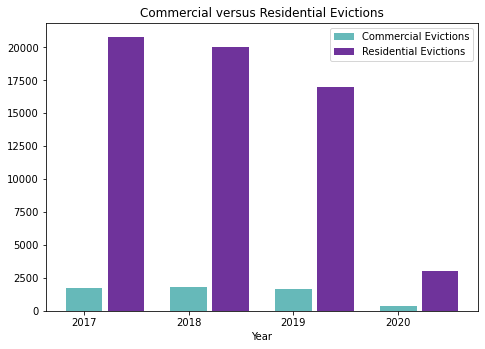

In [8]:
#Calculating amount of residential & commercial evictions per year, then creating ratio.
res17=len(data17[(data17['Residential/Commercial']=='Residential')])
com17=len(data17[(data17['Residential/Commercial']=='Commercial')])
comres17=(com17/res17)*100

res18=len(data18[(data18['Residential/Commercial']=='Residential')])
com18=len(data18[(data18['Residential/Commercial']=='Commercial')])
comres18=(com18/res18)*100

res19=len(data19[(data19['Residential/Commercial']=='Residential')])
com19=len(data19[(data19['Residential/Commercial']=='Commercial')])
comres19=(com19/res19)*100

res20=len(data20[(data20['Residential/Commercial']=='Residential')])
com20=len(data20[(data20['Residential/Commercial']=='Commercial')])
comres20=(com20/res20)*100

#Plotting year-over-year change in commercial versus residential evictions.
fig = plt.figure()

com=[com17, com18, com19, com20]
res= [res17, res18, res19, res20]
data=[com, res]
years = ['2017', '2018', '2019', '2020']

ax_length = np.arange(len(years))
ax = fig.add_axes([0,0, 1, 1])
ax.set_xticks(ax_length)
ax.set_xticklabels(years, c='k')

ax.bar(ax_length + 0.00, data[0], color = 'darkcyan', width = 0.35, alpha = 0.6)
ax.bar(ax_length + 0.4, data[1], color = 'indigo', width = 0.35, alpha = 0.8)

ax.legend(["Commercial Evictions", "Residential Evictions"]);
ax.set_title('Commercial versus Residential Evictions')

plt.xlabel('Year')

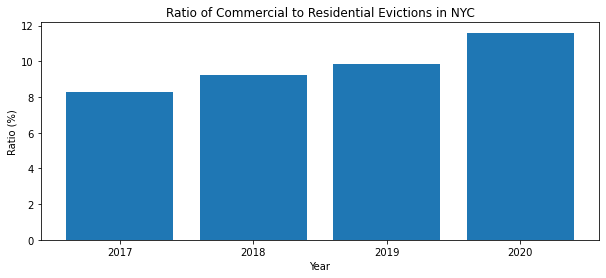

In [9]:
#Plotting year-over-year change in ratio of commercial to residential evictions.
plt.figure(figsize=(10,4))

ratios = [comres17, comres18, comres19, comres20]
years = ['2017', '2018', '2019', '2020']
plt.bar(years, ratios)

plt.xlabel('Year')
plt.ylabel('Ratio (%)')
plt.title('Ratio of Commercial to Residential Evictions in NYC')

plt.show()

The ratio of commercial to residential evictions has increased yearly from 2017 to 2020. As seen in 'Commercial versus Residential Evictions', the number of residential evictions consistently remains higher than commercial evictions. However, commercial evictions have generally increased while residential evictions have generally decreased, causing the ratio between the two to increase.

PROBLEM 4

In [10]:
#Creating new column combining marshals' first names and last names.
data17['Marshal Full Name'] = data17['Marshal First Name'] + ' ' + evictions['Marshal Last Name']
#TCreating a DF of the frequency of each Marshal Full Name
marshal17 = data17.groupby(['Marshal Full Name']).count()
#Isolating one column.
marshal17 = marshal17['Court Index Number']
#Sorting by most frequent to least frequent.
marshal17 = marshal17.sort_values(ascending=False)
#Printing top 5 marshals.
print('Top 2017 Marshals', '\n', marshal17.head(5), '\n')



#Repeating for 2018.
data18['Marshal Full Name'] = data18['Marshal First Name'] + ' ' + evictions['Marshal Last Name']
marshal18 = data18.groupby(['Marshal Full Name']).count()
marshal18 = marshal18['Court Index Number']
marshal18 = marshal18.sort_values(ascending=False)
print('Top 2018 Marshals', '\n', marshal18.head(5), '\n')



#Repeating for 2019.
data19['Marshal Full Name'] = data19['Marshal First Name'] + ' ' + evictions['Marshal Last Name']
marshal19 = data19.groupby(['Marshal Full Name']).count()
marshal19 = marshal19['Court Index Number']
marshal19 = marshal19.sort_values(ascending=False)
print('Top 2019 Marshals', '\n', marshal19.head(5), '\n')



#Repeating for 2020.
data20['Marshal Full Name'] = data20['Marshal First Name'] + ' ' + evictions['Marshal Last Name']
marshal20 = data20.groupby(['Marshal Full Name']).count()
marshal20 = marshal20['Court Index Number']
marshal20 = marshal20.sort_values(ascending=False)
print('Top 2020 Marshals', '\n', marshal20.head(5), '\n')

Top 2017 Marshals 
 Marshal Full Name
Justin Grossman    2842
Danny Weinheim     2044
Ileana Rivera      1937
Thomas Bia         1910
Edward Guida       1794
Name: Court Index Number, dtype: int64 

Top 2018 Marshals 
 Marshal Full Name
Justin Grossman    2977
Henry Daley        2275
Ileana Rivera      1877
Thomas Bia         1848
Edward Guida       1742
Name: Court Index Number, dtype: int64 

Top 2019 Marshals 
 Marshal Full Name
Justin Grossman    2775
Henry Daley        1970
Ileana Rivera      1725
Edward Guida       1572
Thomas Bia         1557
Name: Court Index Number, dtype: int64 

Top 2020 Marshals 
 Marshal Full Name
Justin Grossman    578
Henry Daley        453
Edward Guida       314
Ileana Rivera      303
Thomas Bia         244
Name: Court Index Number, dtype: int64 



<ipython-input-10-2019bfe95958>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17['Marshal Full Name'] = data17['Marshal First Name'] + ' ' + evictions['Marshal Last Name']
<ipython-input-10-2019bfe95958>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data18['Marshal Full Name'] = data18['Marshal First Name'] + ' ' + evictions['Marshal Last Name']
<ipython-input-10-2019bfe95958>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

PROBLEM 5

In [11]:
print('2017 Evictions by Borough', '\n', data17['BOROUGH'].value_counts(), '\n')
print('2018 Evictions by Borough', '\n', data18['BOROUGH'].value_counts(), '\n')
print('2019 Evictions by Borough', '\n', data19['BOROUGH'].value_counts(), '\n')
print('2020 Evictions by Borough', '\n', data20['BOROUGH'].value_counts(), '\n')

2017 Evictions by Borough 
 BRONX            7662
BROOKLYN         6357
QUEENS           4325
MANHATTAN        3452
STATEN ISLAND     734
Name: BOROUGH, dtype: int64 

2018 Evictions by Borough 
 BRONX            7140
BROOKLYN         6157
QUEENS           4452
MANHATTAN        3390
STATEN ISLAND     691
Name: BOROUGH, dtype: int64 

2019 Evictions by Borough 
 BRONX            6188
BROOKLYN         5312
QUEENS           3705
MANHATTAN        2806
STATEN ISLAND     636
Name: BOROUGH, dtype: int64 

2020 Evictions by Borough 
 BRONX            1061
BROOKLYN         1003
QUEENS            693
MANHATTAN         518
STATEN ISLAND     112
Name: BOROUGH, dtype: int64 



The boroughs have remained in the same position year-over-year in terms of highest evictions, with the Bronx leading each year and Staten Island with the fewest evictions. Staten Island has the lowest population, so its position makes sense. However, Bronx has the second lowest population, meaning there must be additional factors causing high evictions other than its absolute population size. Brooklyn has a comparable number of evictions to the Bronx, but it's the most populous borough, so this number makes sense. Queens and Manhattan are the second and third most populous boroughs, so their positions are logical as well.

PROBLEM 6

In [12]:
#Creating a DF of the frequency of each NTA
NTA_count = data17.groupby(['NTA']).count()
#Isolating one column.
NTA_count = NTA_count['Court Index Number']

#Opening NTA shapefile and associating it with variable.
NTA17 = gpd.read_file("NTA file.zip")
#Creating new column to merge on with same name.
NTA17['NTA'] = NTA17['ntaname']
#Merging count data with NTA geographical data.
NTA17 = NTA17.merge(NTA_count, on='NTA')
#Merging count+NTA geographical data with evictions data.
NTA17 = NTA17.merge(data17, on='NTA')

#Renaming count column for readability.
NTA17.rename(columns={'Court Index Number_x': 'NTA Count'}, inplace=True)
#Printing max frequency so map legends are all on the same scale for comparability.
print(NTA17['NTA Count'].max())



#Repeating for 2018.
NTA_count = data18.groupby(['NTA']).count()
NTA_count = NTA_count['Court Index Number']

NTA18 = gpd.read_file("NTA file.zip")
NTA18['NTA'] = NTA18['ntaname']
NTA18 = NTA18.merge(NTA_count, on='NTA')
NTA18 = NTA18.merge(data18, on='NTA')

NTA18.rename(columns={'Court Index Number_x': 'NTA Count'}, inplace=True)
print(NTA18['NTA Count'].max())



#Repeating for 2019.
NTA_count = data19.groupby(['NTA']).count()
NTA_count = NTA_count['Court Index Number']

NTA19 = gpd.read_file("NTA file.zip")
NTA19['NTA'] = NTA19['ntaname']
NTA19 = NTA19.merge(NTA_count, on='NTA')
NTA19 = NTA19.merge(data19, on='NTA')

NTA19.rename(columns={'Court Index Number_x': 'NTA Count'}, inplace=True)
print(NTA19['NTA Count'].max())



#Repeating for 2020.
NTA_count = data20.groupby(['NTA']).count()
NTA_count = NTA_count['Court Index Number']

NTA20 = gpd.read_file("NTA file.zip")
NTA20['NTA'] = NTA20['ntaname']
NTA20 = NTA20.merge(NTA_count, on='NTA')
NTA20 = NTA20.merge(data20, on='NTA')

NTA20.rename(columns={'Court Index Number_x': 'NTA Count'}, inplace=True)
print(NTA20['NTA Count'].max())

454
460
407
65


Text(0.5, 1.0, '2017 Evictions')

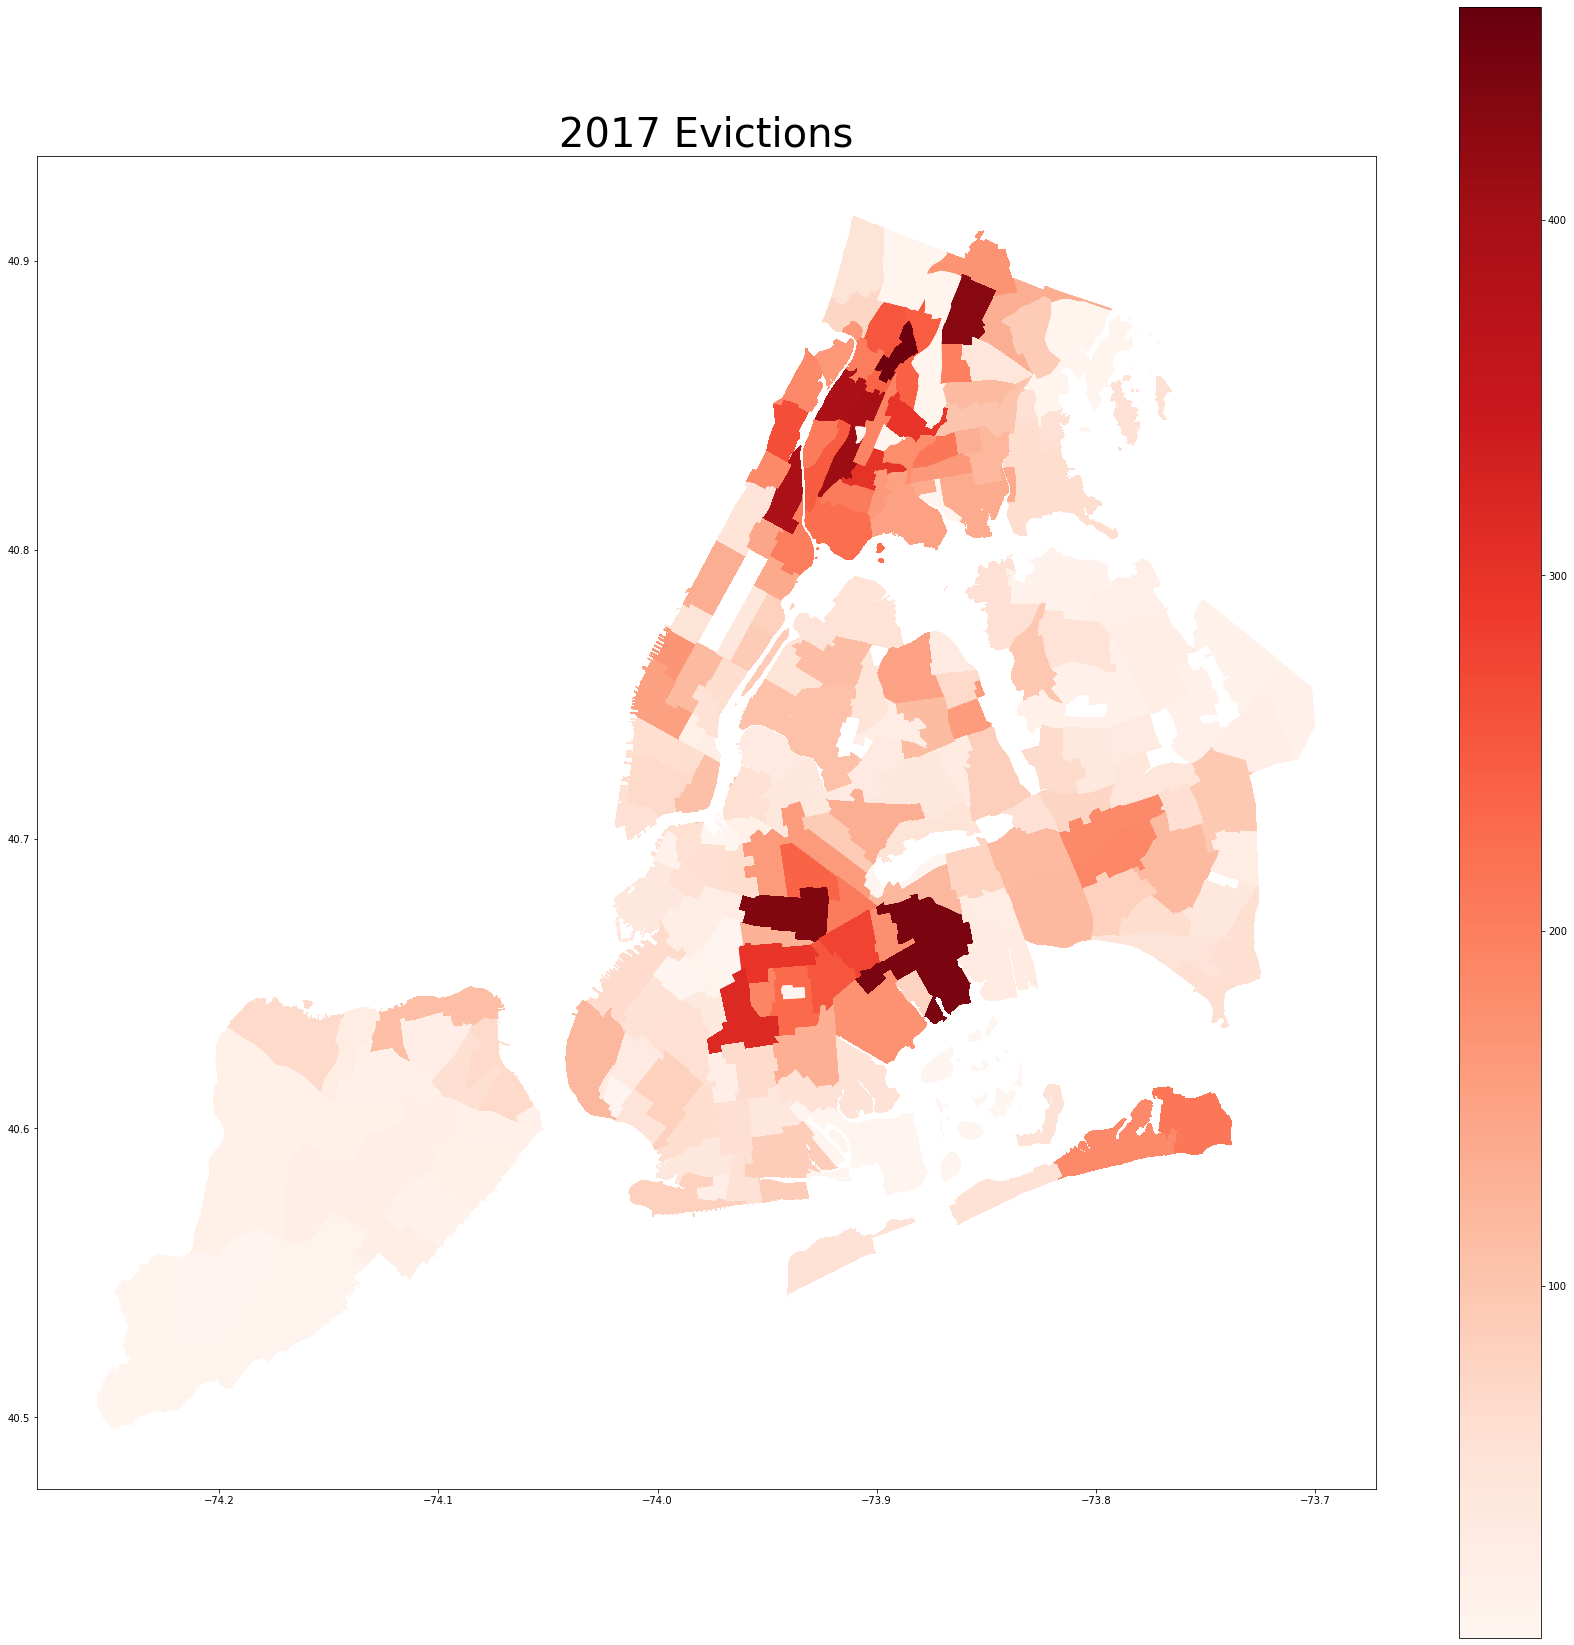

In [13]:
#Plotting based on count data. Making legend max the max frequency from previous step.
NTA17.plot(column='NTA Count',figsize=(30, 30),legend=True, vmin=1, vmax=460, cmap='Reds')
plt.title('2017 Evictions', fontsize=40)

2017 evictions were most common in Brooklyn and the Bronx. Areas of Queens and Manhattan also had moderately high evictions.

Text(0.5, 1.0, '2018 Evictions')

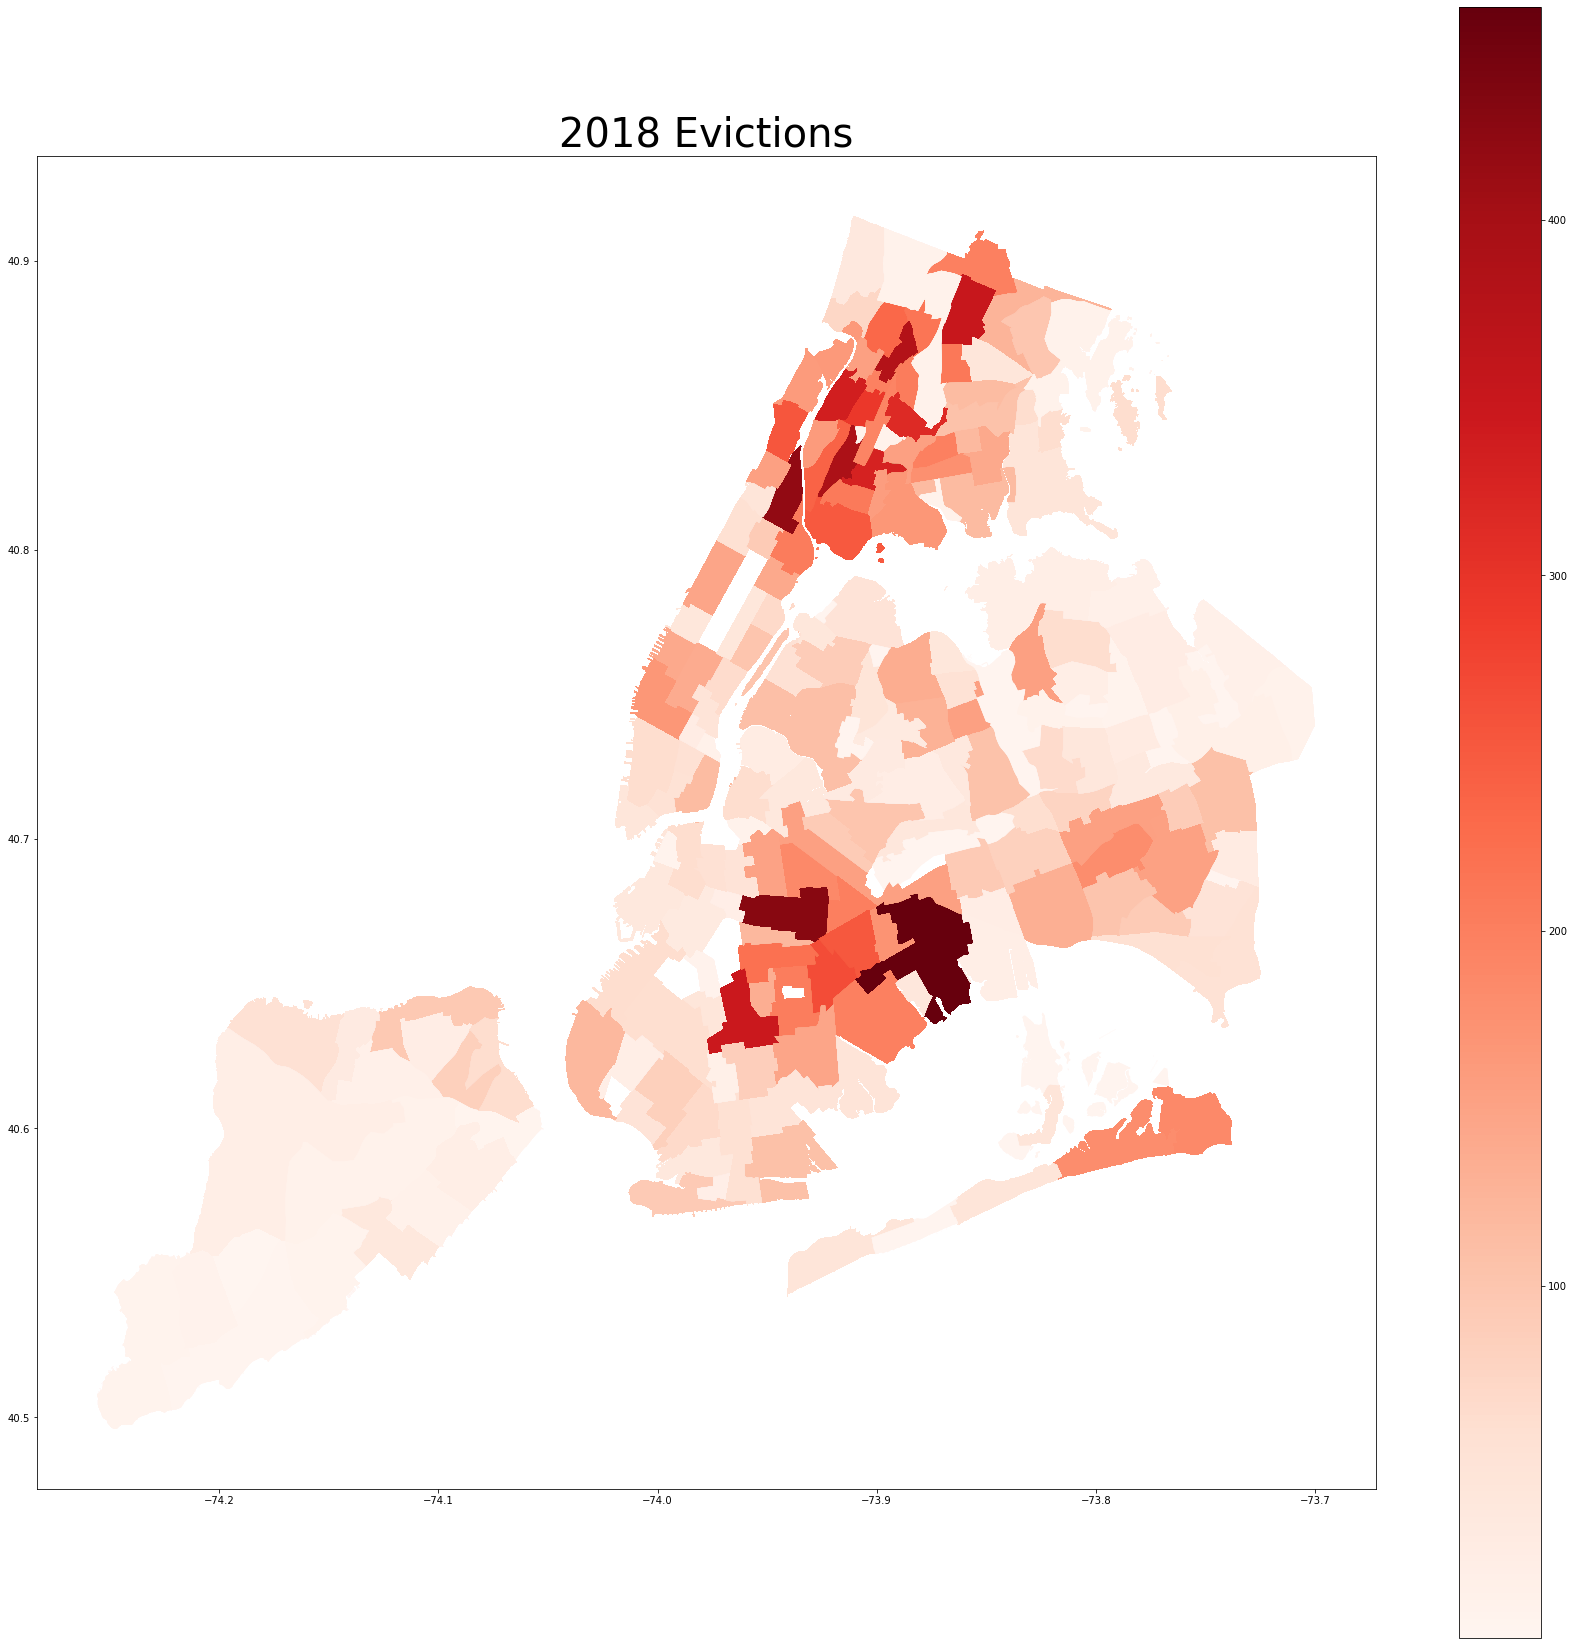

In [14]:
NTA18.plot(column='NTA Count',figsize=(30, 30),legend=True, vmin=1, vmax=460, cmap='Reds')
plt.title('2018 Evictions', fontsize=40)

2018 evictions were very similar to 2017 evictions. The same NTAs experienced high levels of evictions compared to the rest of the city as in 2017. Some NTAs in the Bronx experienced fewer evictions than in 2017.

Text(0.5, 1.0, '2019 Evictions')

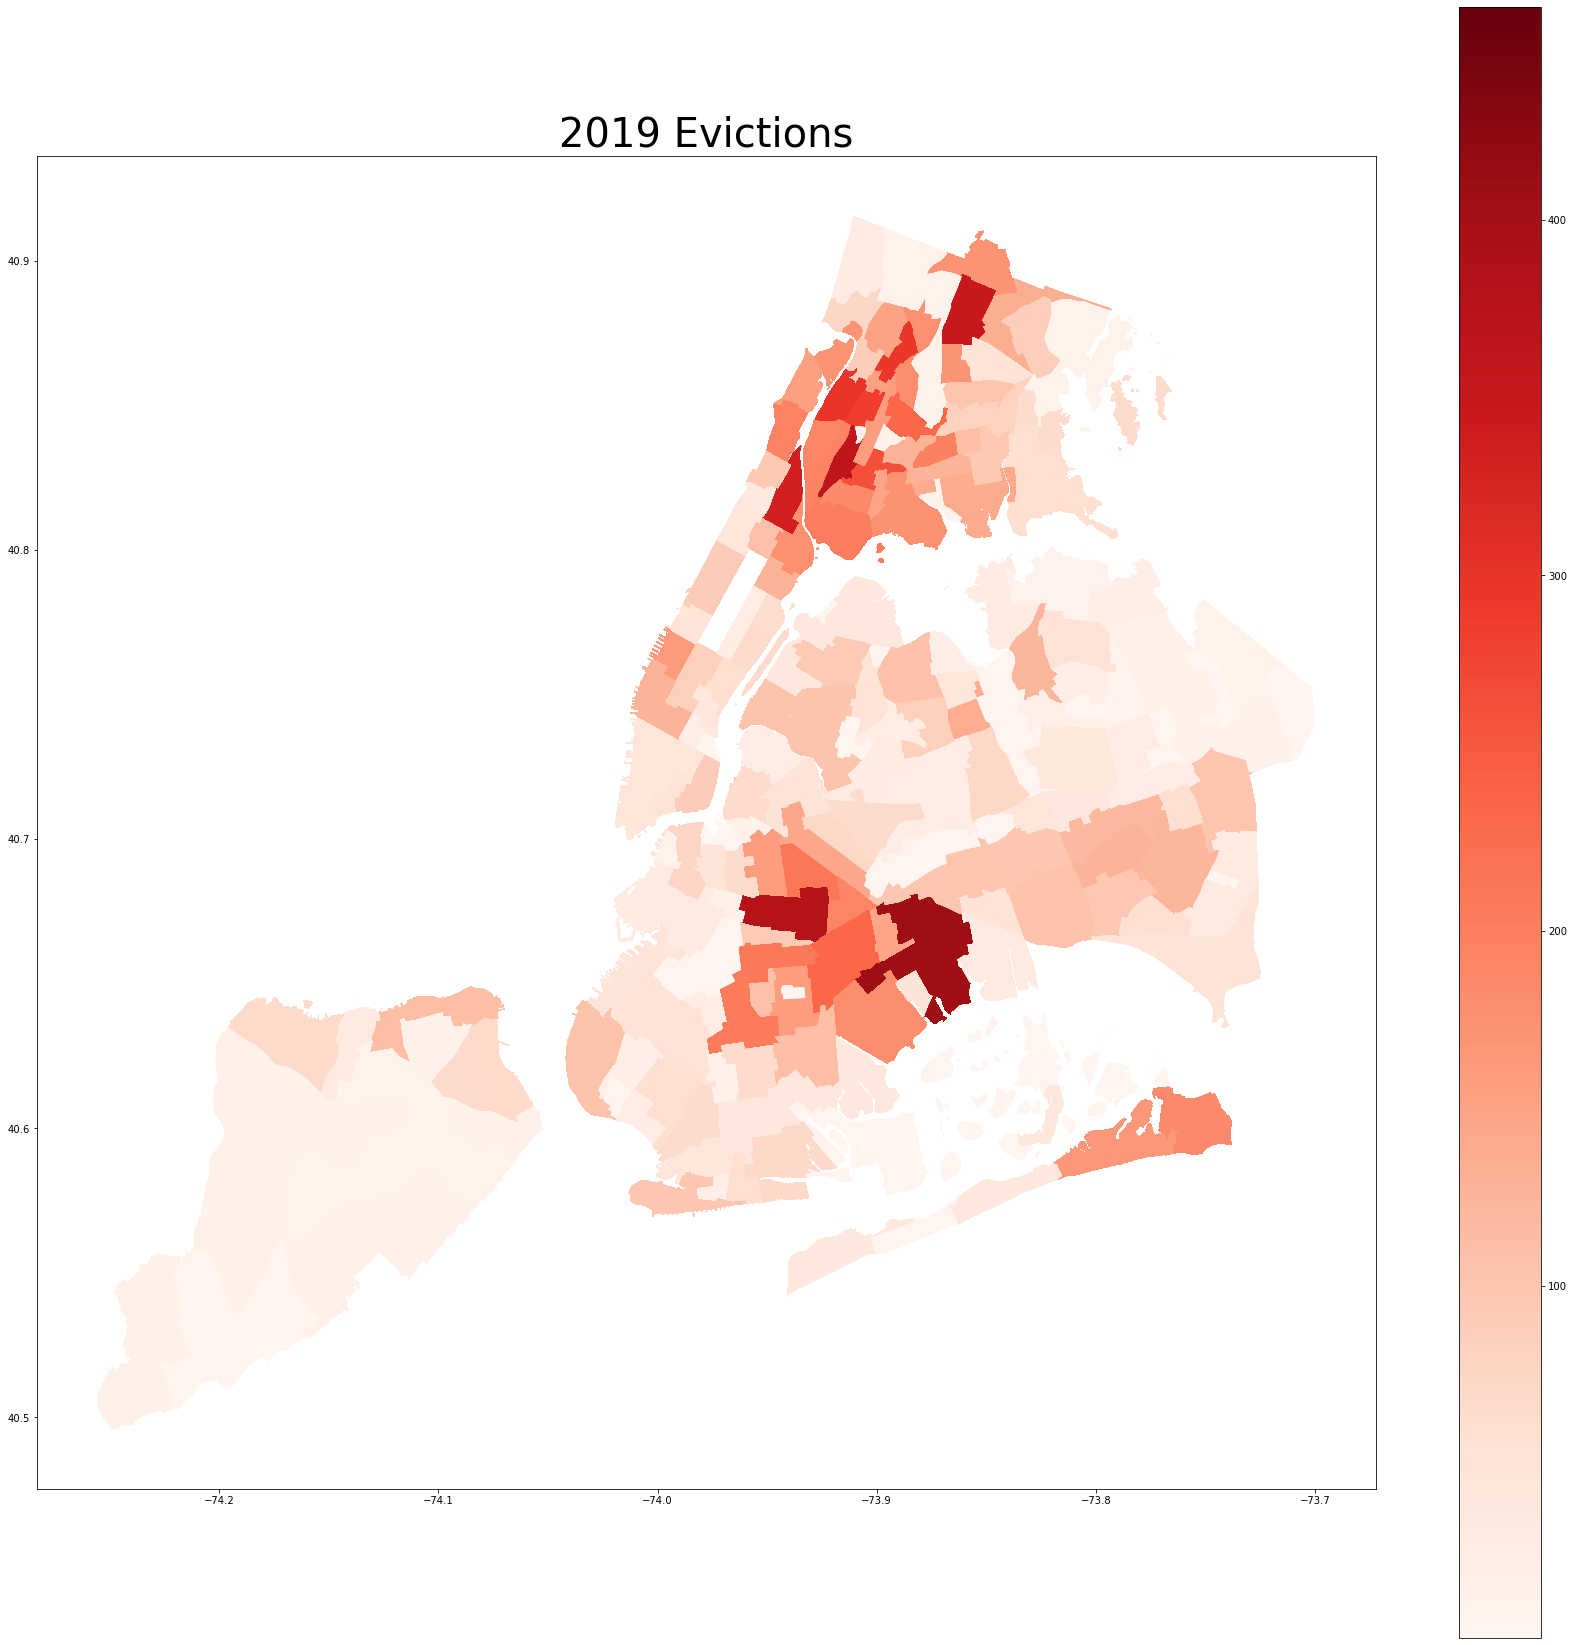

In [15]:
NTA19.plot(column='NTA Count',figsize=(30, 30),legend=True, vmin=1, vmax=460, cmap='Reds')
plt.title('2019 Evictions', fontsize=40)

While the same NTAs are experiencing higher eviction levels than the rest of the city as in previous years, overall eviction levels have decreased from 2017 and 2018.

Text(0.5, 1.0, '2020 Evictions')

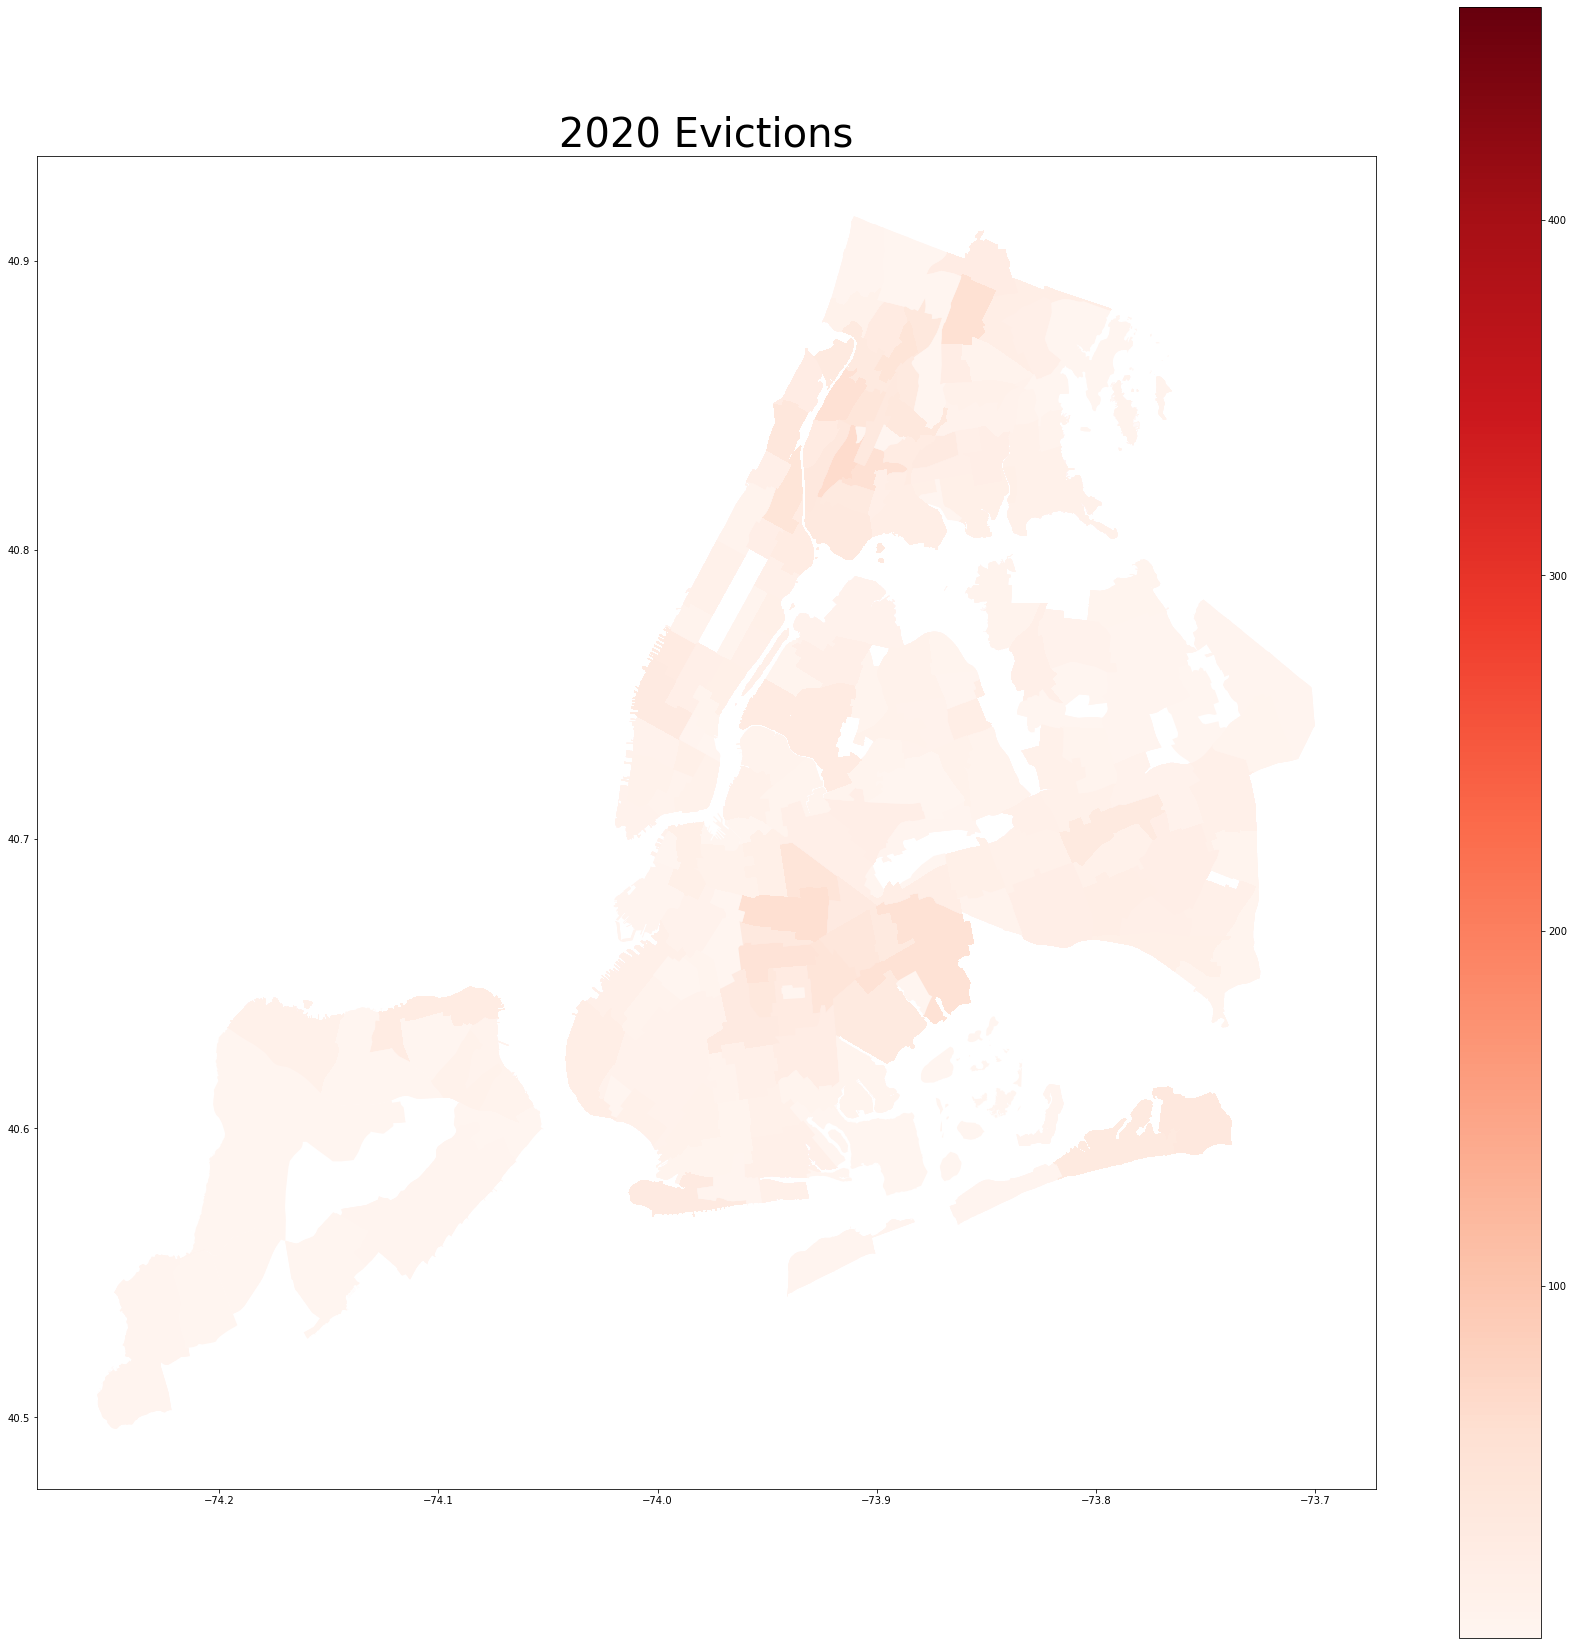

In [16]:
NTA20.plot(column='NTA Count',figsize=(30, 30), legend=True, vmin=1, vmax=460, cmap='Reds')
plt.title('2020 Evictions', fontsize=40)

Evictions dropped extremely low in 2020 due to the eviction moratorium in NYC. The high eviction-level NTAs from previous years no longer appear in 2020. In previous years, NTAs that stood out had higher eviction levels than the rest of the city. In 2020, most NTAs had comparable eviction levels, so NTAs with markedly few evictions stand out in this map. This includes NTAs in Staten Island, Queens, and the Bronx.

Overall, evictions have steadily been decreasing year-over-year. 2020 is an outlier due to the evictions moratorium. It will be interesting to see the pace at which evictions increase when the moratorium is lifted over the summer of 2021.

PROBLEM 7

In [17]:
#Opening CSV file of Housing New York units created since 2014 that contribute to affordable housing plan.
LI = pd.read_csv('housing.csv')
#Changing date column to readable format.
LI['Project Start Date'] = pd.to_datetime(LI['Project Start Date'], format="%m/%d/%Y")

#Creating DF of 2017 data.
LI17 = LI[(LI['Project Start Date']>'2017-01-01')  & (LI['Project Start Date']<'2017-12-31')]
#Data for unit type is integer that represents how many units of given type were constructed in that building.
#Looping through each unit type to add each data point until none left. Final variable represents total number of unit types in
#that building. (Extremely Low, Very Low, Low, Moderate, Middle, Other)
extreme_low17=0
for i in (LI17['Extremely Low Income Units']):
    extreme_low17=extreme_low17+i

very_low17=0
for i in (LI17['Very Low Income Units']):
    very_low17=very_low17+i    
    
low17=0
for i in (LI17['Low Income Units']):
    low17=low17+i     

mod17=0
for i in (LI17['Moderate Income Units']):
    mod17=mod17+i 

mid17=0
for i in (LI17['Middle Income Units']):
    mid17=mid17+i 
    
other17=0
for i in (LI17['Other Income Units']):
    other17=other17+i    
    
#Creating total number of affordable housing units formed under Housing New York Plan in 2017.
units17=extreme_low17+very_low17+low17+mod17+mid17+other17
    

    
#Repeating for 2018.    
LI18 = LI[(LI['Project Start Date']>'2018-01-01')  & (LI['Project Start Date']<'2018-12-31')]
extreme_low18=0
for i in (LI18['Extremely Low Income Units']):
    extreme_low18=extreme_low18+i

very_low18=0
for i in (LI18['Very Low Income Units']):
    very_low18=very_low18+i
    
low18=0
for i in (LI18['Low Income Units']):
    low18=low18+i
    
mod18=0
for i in (LI18['Moderate Income Units']):
    mod18=mod18+i 

mid18=0
for i in (LI18['Middle Income Units']):
    mid18=mid18+i 
    
other18=0
for i in (LI18['Other Income Units']):
    other18=other18+i     

units18=extreme_low18+very_low18+low18+mod18+mid18+other18 



#Repeating for 2019.
LI19 = LI[(LI['Project Start Date']>'2019-01-01')  & (LI['Project Start Date']<'2019-12-31')]
extreme_low19=0
for i in (LI19['Extremely Low Income Units']):
    extreme_low19=extreme_low19+i

very_low19=0
for i in (LI19['Very Low Income Units']):
    very_low19=very_low19+i

low19=0
for i in (LI19['Low Income Units']):
    low19=low19+i
        
mod19=0
for i in (LI19['Moderate Income Units']):
    mod19=mod19+i 

mid19=0
for i in (LI19['Middle Income Units']):
    mid19=mid19+i 
    
other19=0
for i in (LI19['Other Income Units']):
    other19=other19+i     


units19=extreme_low19+very_low19+low19+mod19+mid19+other19



#Repeating for 2020.
LI20 = LI[(LI['Project Start Date']>'2020-01-01')  & (LI['Project Start Date']<'2020-12-31')]
extreme_low20=0
for i in (LI20['Extremely Low Income Units']):
    extreme_low20=extreme_low20+i

very_low20=0
for i in (LI20['Very Low Income Units']):
    very_low20=very_low20+i

low20=0
for i in (LI20['Low Income Units']):
    low20=low20+i
    
mod20=0
for i in (LI20['Moderate Income Units']):
    mod20=mod20+i 

mid20=0
for i in (LI20['Middle Income Units']):
    mid20=mid20+i 
    
other20=0
for i in (LI20['Other Income Units']):
    other20=other20+i     

units20=extreme_low20+very_low20+low20+mod20+mid20+other20

In [18]:
#Creating variable to hold total number of evictions each year.
evict17=len(evictions[(evictions['Executed Date']>'2017-01-01 00:00:00') 
                & (evictions['Executed Date']<'2017-12-31 23:59:59')])

evict18=len(evictions[(evictions['Executed Date']>'2018-01-01 00:00:00') 
                & (evictions['Executed Date']<'2018-12-31 23:59:59')])

evict19=len(evictions[(evictions['Executed Date']>'2019-01-01 00:00:00') 
                & (evictions['Executed Date']<'2019-12-31 23:59:59')])

evict20=len(evictions[(evictions['Executed Date']>'2020-01-01 00:00:00') 
                & (evictions['Executed Date']<'2020-12-31 23:59:59')])

Text(0.5, 0, 'Year')

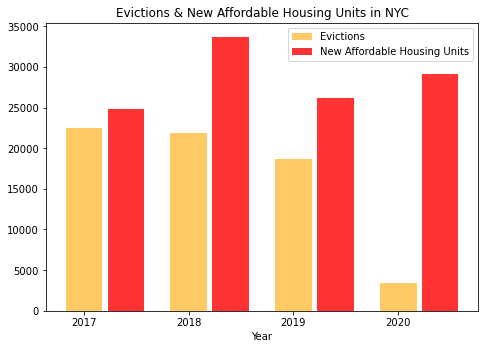

In [19]:
#Plotting number of evictions against number of new affordable housing units constructed.

fig = plt.figure()

evict=[evict17, evict18, evict19, evict20]
units= [units17, units18, units19, units20]
data=[evict, units]
years = ['2017', '2018', '2019', '2020']

ax_length = np.arange(len(years))
ax = fig.add_axes([0,0, 1, 1])
ax.set_xticks(ax_length)
ax.set_xticklabels(years, c='k')

ax.bar(ax_length + 0.00, data[0], color = 'orange', width = 0.35, alpha = 0.6)
ax.bar(ax_length + 0.4, data[1], color = 'red', width = 0.35, alpha = 0.8)

ax.legend(["Evictions", "New Affordable Housing Units"]);
ax.set_title('Evictions & New Affordable Housing Units in NYC')

plt.xlabel('Year')

I predicted that the number of new affordable housing units being constructed each year would increase as evictions decreased. Instead, the construction of new affordable housing units hasn't followed any particular trend between 2017-2020. I assumed that better access to affordable housing would lead to less evictions, but there is no clear relationship. My next step would be to compare where new affordable units are being constructed compared to where evictions are happening around the city. This may shed light on why the dataset of affordable housing I used has no visible relationship with evictions.

Source: https://data.cityofnewyork.us/Housing-Development/Housing-New-York-Units-by-Building/hg8x-zxpr